# Notebook de Análise do Lote Inicial

### Imports

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [97]:
print("Testando")

Testando


### Definindo os chunks pelo número de linhas

In [ ]:
# Definindo o tamanho do chunk para x linhas (alterar abaixo para mudar o tamanho do chunk)
chunksize = 20

# Lista para armazenar os chunks processados
chunks = []

reader = pd.read_csv('LoteInicial.csv', chunksize=chunksize)
for chunk in reader:
    # Adicionar o chunk à lista
    chunks.append(chunk)

# Concatenar todos os chunks para formar o arquivo completo
arquivo_completo = pd.concat(chunks)

# Salvar o arquivo completo como parquet
arquivo_completo.to_parquet('arquivo_completo.parquet')

# Exibindo o primeiro chunk
print(chunks[0])

## Análise do Chunks Selecionado do Lote Inicial

In [85]:
print(chunk['ISIN'].unique())
print(chunk['Fund Group Name'].unique())
print(chunk['Dynamic Data Type'].unique())

['LU1883342021']
['Amundi']
['FE Bid' 'FE Total Return Bid' 'FE Gross Total Return Bid' 'FE Offer'
 'FE Total Return Offer' 'FE Gross Total Return Offer']


In [86]:
print(chunk['Dynamic Value'].describe())

count    20.000000
mean     64.224000
std       0.383891
min      63.710000
25%      63.710000
50%      64.270000
75%      64.480000
max      64.860000
Name: Dynamic Value, dtype: float64


In [87]:
chunk['General Reference Date'] = pd.to_datetime(chunk['General Reference Date'])

In [88]:
print(chunk.groupby('General Reference Date')['Dynamic Value'].mean())

General Reference Date
2022-07-17    64.27
2022-07-18    63.71
2022-07-19    64.48
2022-07-20    64.86
Name: Dynamic Value, dtype: float64


In [89]:
frequencias = chunk.groupby(['ISIN', 'Dynamic Data Type']).size()
print(frequencias)

ISIN          Dynamic Data Type          
LU1883342021  FE Bid                         4
              FE Gross Total Return Bid      3
              FE Gross Total Return Offer    3
              FE Offer                       3
              FE Total Return Bid            4
              FE Total Return Offer          3
dtype: int64


In [90]:
Q1 = chunk['Dynamic Value'].quantile(0.25)
Q3 = chunk['Dynamic Value'].quantile(0.75)
IQR = Q3 - Q1

# Definir outliers como valores fora de 1.5 vezes o IQR
outliers = chunk[(chunk['Dynamic Value'] < (Q1 - 1.5 * IQR)) | (chunk['Dynamic Value'] > (Q3 + 1.5 * IQR))]
print(outliers)

Empty DataFrame
Columns: [ISIN, Fund Group Name, Dynamic Currency, General Reference Date, Dynamic Data Type, Dynamic Value]
Index: []


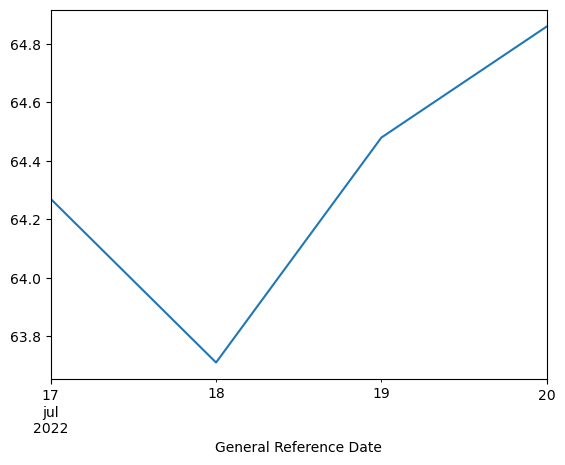

In [91]:
chunk['General Reference Date'] = pd.to_datetime(chunk['General Reference Date'])
    
# Filtrar por 'FE Bid' e calcular média por data
fe_bid = chunk[chunk['Dynamic Data Type'] == 'FE Bid']
media_por_data = fe_bid.groupby('General Reference Date')['Dynamic Value'].mean()
    
# Plotar a média ao longo do tempo
media_por_data.plot()
plt.show()

In [92]:
media_por_grupo = chunk.groupby('Fund Group Name')['Dynamic Value'].mean()
print(media_por_grupo)

Fund Group Name
Amundi    64.224
Name: Dynamic Value, dtype: float64
